In [14]:
import sklearn.ensemble
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
#print(heart_disease.metadata) 
  
# variable information 
#print(heart_disease.variables) 

In [2]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [3]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [10]:
Xy = X.assign(y=y).dropna()
X = Xy[X.columns]
y = Xy.y

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

In [5]:
rfc = sklearn.ensemble.RandomForestClassifier()

In [12]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
rfc.score(X_test, y_test)

0.5630252100840336

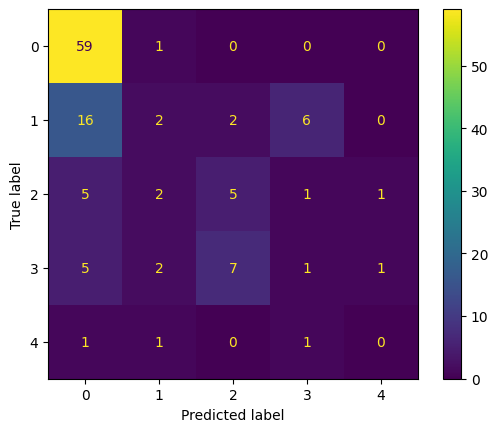

In [15]:
predictions = rfc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()